## INSTALL 제거 버전

In [16]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import ast
from scipy.stats import ttest_ind
import seaborn as sns

In [17]:
parquet_file = 'C:/Users/USER/OneDrive - postech.ac.kr/바탕 화면/final_seq_data.parquet'
# Parquet 파일 열기
table = pq.read_table(parquet_file)

# Table에서 데이터를 DataFrame으로 변환
data = table.to_pandas()
print(data.shape)

(13522573, 71)


In [18]:
# Replace 'df' with your actual DataFrame variable name
data.rename(columns={'MONTH_YYYYMM': 'MONTH'}, inplace=True)

# Convert 'MONTH' column to strings and extract the last two characters
data['MONTH'] = data['MONTH'].astype(str).str[-2:]

# Display the modified DataFrame
print(data['MONTH'])

0           01
1           01
3           01
5           01
6           01
            ..
14196328    06
14196329    06
14196330    06
14196331    06
14196332    06
Name: MONTH, Length: 13522573, dtype: object


In [19]:
data.shape

(13522573, 71)

In [20]:
data = data[['MONTH', 'RECLAIM_PERIOD', 'SUBSIDIARY_NAME',
       'CAPTIVE_CHANNEL_FLAG', 'COMPANY_CODE',
       'DIVISION_NAME', 'MODEL_CODE', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3',
       'PARTS_NO4', 'PARTS_NO5', 'RECEIPT_SYMPTOM','CENTER_CODE', 
       'PREV_CENTER_CODE', 'PRODUCT_NAME','RECLAIM', 'WARRANTY_TYPE', 'PREV_WARRANTY_TYPE',
       'SVC_TYPE', 'PREV_SVC_TYPE', 'ENGINEER_CODE', 'PREV_ENGINEER_CODE','ENGINEER_REPAIR', 'PREV_ENGINEER_SYMPTOM','MULTICLAIM','PREV_RECEIPT_SYMPTOM']]

print(data.shape)

(13522573, 27)


In [21]:
# 저장할 Parquet 파일 경로 지정
parquet_file_path = 'C:/Users/USER/OneDrive - postech.ac.kr/바탕 화면/final_column제거.parquet'

# DataFrame을 Parquet 파일로 저장
data.to_parquet(parquet_file_path, engine='pyarrow')

In [5]:
data['MULTICLAIM'].value_counts()

MULTICLAIM
1     13127837
2       360887
3        28338
4         4193
5          885
6          224
7           84
8           49
9           24
10          14
11          11
12          10
14           5
15           4
13           2
18           1
20           1
21           1
19           1
24           1
16           1
Name: count, dtype: int64

In [6]:
data['RECLAIM'].value_counts()

RECLAIM
0    13127837
1      394736
Name: count, dtype: int64

In [8]:
data['SUBSIDIARY_NAME'].value_counts()

SUBSIDIARY_NAME
LGEIL    12511963
LGEAI     1010610
Name: count, dtype: int64

In [ ]:
# 'nstall' 또는 'NSTALL'을 포함하는 행 제거
df = df[~df['RECEIPT_SYMPTOM'].str.contains('nstall', case=False, na=False)]
df = df[~df['RECEIPT_SYMPTOM'].str.contains('NSTALL', case=False, na=False)]
df.shape

In [10]:
usa_data = data[data['SUBSIDIARY_NAME'] =='LGEAI']
usa_data.shape

(1010610, 71)

In [ ]:
usa_df = usa_data.copy()

## MONTH 변경

In [21]:
# Replace 'df' with your actual DataFrame variable name
data.rename(columns={'MONTH_YYYYMM': 'MONTH'}, inplace=True)

# Convert 'MONTH' column to strings and extract the last two characters
data['MONTH'] = data['MONTH'].astype(str).str[-2:]

# Display the modified DataFrame
print(data['MONTH'])

0           01
1           01
2           01
3           01
4           01
            ..
14196328    06
14196329    06
14196330    06
14196331    06
14196332    06
Name: MONTH, Length: 13881284, dtype: object


## 1. 미국 데이터 분리

## 필요 컬럼만 추출(사전 합의o)

In [23]:
usa_df = usa_df[['MONTH', 'RECLAIM_PERIOD',
       'CAPTIVE_CHANNEL_FLAG', 'COMPANY_CODE',
       'DIVISION_NAME', 'MODEL_CODE', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3',
       'PARTS_NO4', 'PARTS_NO5', 'RECEIPT_SYMPTOM','CENTER_CODE', 
       'PREV_CENTER_CODE', 'PRODUCT_NAME','RECLAIM', 'WARRANTY_TYPE', 'PREV_WARRANTY_TYPE',
       'SVC_TYPE', 'PREV_SVC_TYPE', 'ENGINEER_CODE', 'PREV_ENGINEER_CODE','ENGINEER_REPAIR', 'PREV_ENGINEER_SYMPTOM','MULTICLAIM','PREV_RECEIPT_SYMPTOM']]

print(usa_df.shape)

(1096354, 26)


## 2.결측률 확인 및 95% 이상 컬럼 삭제

In [24]:

# 각 컬럼의 결측률 계산
missing_percentage = usa_df.isnull().mean()

# 결측률을 데이터프레임으로 변환
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values * 100
})

# 결과 출력
missing_df.head()

,Column,Missing Percentage
0,MONTH,0.000000
1,RECLAIM_PERIOD,91.320504
2,CAPTIVE_CHANNEL_FLAG,0.000000
3,COMPANY_CODE,0.000000
4,DIVISION_NAME,0.000000


In [25]:
"""# 결측률 계산
missing_percentage = usa_df.isnull().mean()

# 결측률이 95% 이상인 컬럼 선택
columns_to_drop = missing_percentage[missing_percentage >= 0.95].index

# 선택된 컬럼 삭제
usa_df = usa_df.drop(columns=columns_to_drop)

# 삭제된 컬럼 확인
print("삭제된 컬럼:", columns_to_drop)
usa_df.shape"""

'# 결측률 계산\nmissing_percentage = usa_df.isnull().mean()\n\n# 결측률이 95% 이상인 컬럼 선택\ncolumns_to_drop = missing_percentage[missing_percentage >= 0.95].index\n\n# 선택된 컬럼 삭제\nusa_df = usa_df.drop(columns=columns_to_drop)\n\n# 삭제된 컬럼 확인\nprint("삭제된 컬럼:", columns_to_drop)\nusa_df.shape'

## 4. ENGINEER_REPAIR 상위 10개로 필터링

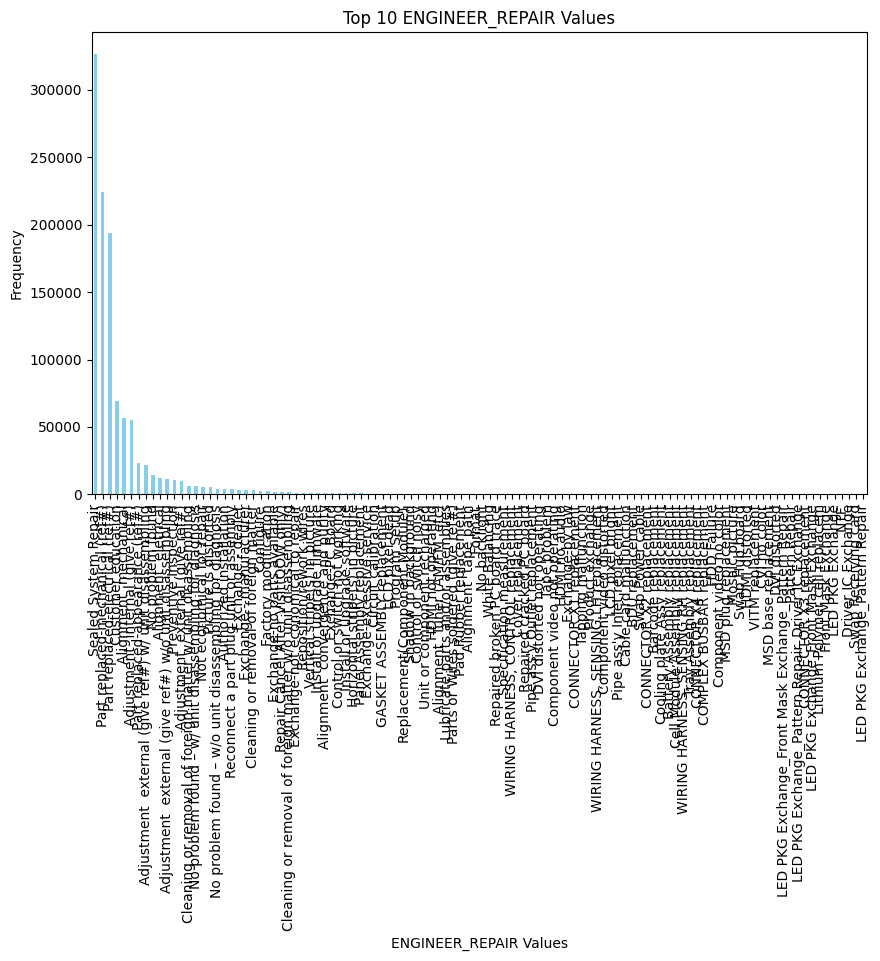

In [26]:
engineer_repair_counts = usa_df['ENGINEER_REPAIR'].value_counts()
# 빈도 시각화
plt.figure(figsize=(10, 6))
engineer_repair_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 ENGINEER_REPAIR Values')
plt.xlabel('ENGINEER_REPAIR Values')
plt.ylabel('Frequency')
plt.show()

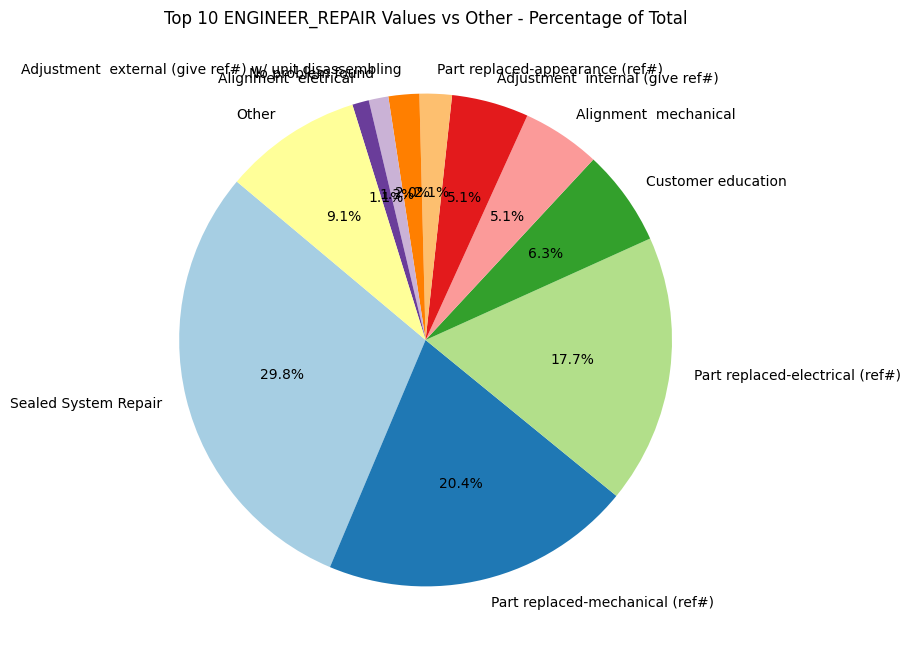

In [27]:
# 상위 10개 값을 갖는 빈도만 추출
top_10_counts = engineer_repair_counts.head(10)

# 나머지 클래스의 빈도 계산
other_counts = engineer_repair_counts[10:].sum()

# 상위 10개와 나머지 클래스의 빈도를 합쳐서 새로운 데이터프레임 생성
combined_counts = pd.concat([top_10_counts, pd.Series({'Other': other_counts})])

# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 ENGINEER_REPAIR Values vs Other - Percentage of Total')
plt.show()

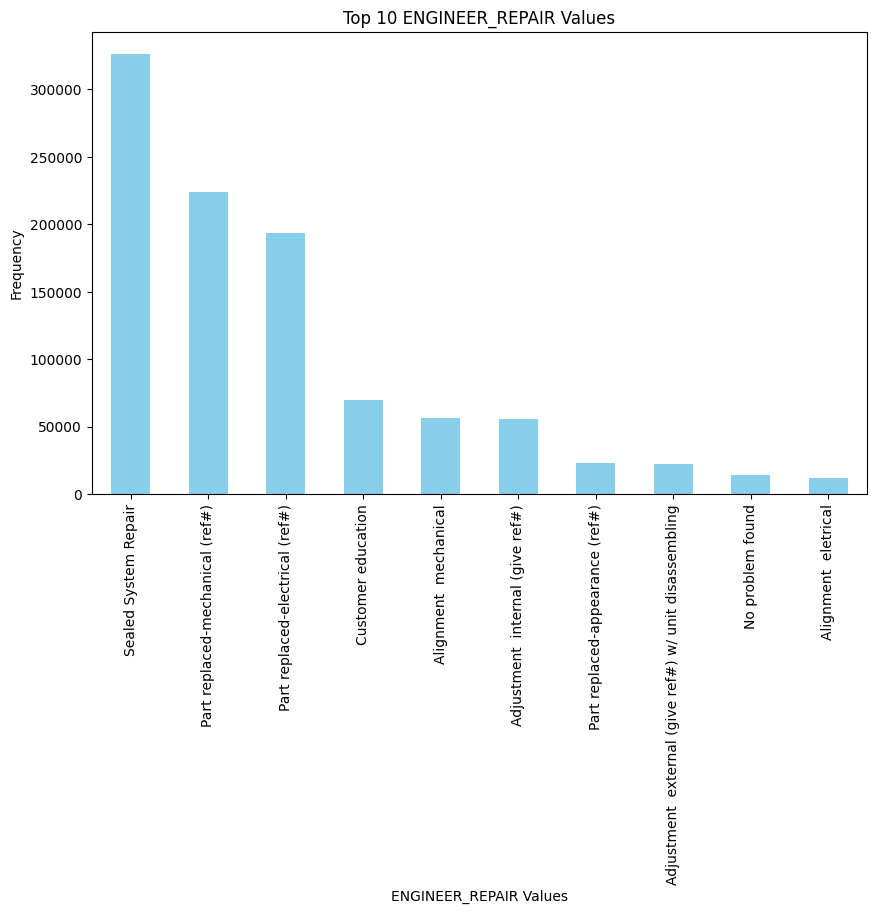

In [28]:
engineer_repair_counts = usa_df['ENGINEER_REPAIR'].value_counts()
# 빈도 시각화
plt.figure(figsize=(10, 6))
engineer_repair_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 ENGINEER_REPAIR Values')
plt.xlabel('ENGINEER_REPAIR Values')
plt.ylabel('Frequency')
plt.show()

In [29]:
# 상위 10개 값을 갖는 관측치만 필터링
top_10_values = engineer_repair_counts.head(10).index
filtered_df = usa_df[usa_df['ENGINEER_REPAIR'].isin(top_10_values)]
filtered_df.shape

(996723, 26)

In [30]:
filtered_df.columns

Index(['MONTH', 'RECLAIM_PERIOD', 'CAPTIVE_CHANNEL_FLAG', 'COMPANY_CODE',
       'DIVISION_NAME', 'MODEL_CODE', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3',
       'PARTS_NO4', 'PARTS_NO5', 'RECEIPT_SYMPTOM', 'CENTER_CODE',
       'PREV_CENTER_CODE', 'PRODUCT_NAME', 'RECLAIM', 'WARRANTY_TYPE',
       'PREV_WARRANTY_TYPE', 'SVC_TYPE', 'PREV_SVC_TYPE', 'ENGINEER_CODE',
       'PREV_ENGINEER_CODE', 'ENGINEER_REPAIR', 'PREV_ENGINEER_SYMPTOM',
       'MULTICLAIM', 'PREV_RECEIPT_SYMPTOM'],
      dtype='object')

## 5. 파츠 분석

In [31]:
filtered_df['PARTS_NO1'].value_counts()

PARTS_NO1
LGE_PARTS_33913    119173
LGE_PARTS_16221     71273
LGE_PARTS_5313      37442
LGE_PARTS_13710     16981
LGE_PARTS_6493      15656
                    ...  
LGE_PARTS_7554          1
LGE_PARTS_23174         1
LGE_PARTS_11915         1
LGE_PARTS_24713         1
LGE_PARTS_19348         1
Name: count, Length: 14900, dtype: int64

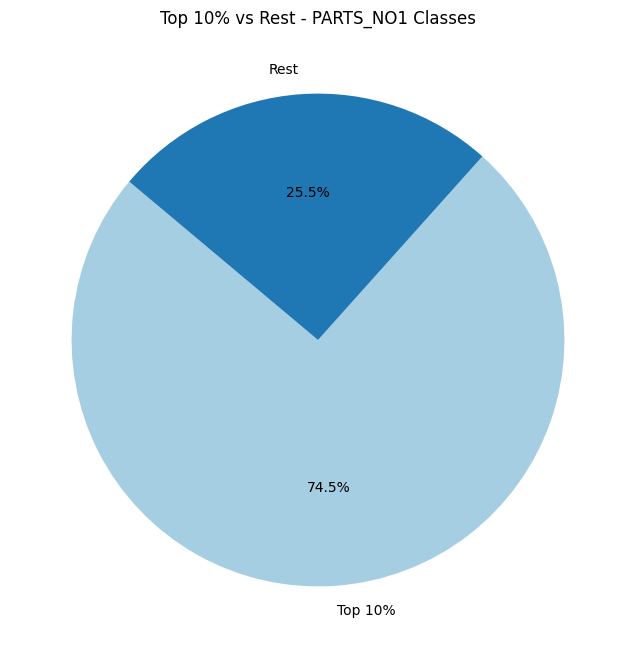

Top 10% vs Rest - PARTS_NO1 Classes:
Top 10% Sum: 742450
Rest Sum: 254273


In [32]:
# 'PARTS_NO1' 컬럼의 빈도 확인
parts_no1_counts = filtered_df['PARTS_NO1'].value_counts()

# 빈도 기준으로 상위 10% 찾기
top_10_percent_threshold = int(len(filtered_df) * 0.1)
top_10_classes = parts_no1_counts.head(top_10_percent_threshold).index

# 상위 10%에 속하는 데이터 필터링
top_10_percent_df = filtered_df[filtered_df['PARTS_NO1'].isin(top_10_classes)]

# 상위 10%와 나머지의 합 계산
top_10_percent_sum = len(top_10_percent_df)
rest_sum = len(filtered_df) - top_10_percent_sum

# 시각화
plt.figure(figsize=(8, 8))
plt.pie([top_10_percent_sum, rest_sum], labels=['Top 10%', 'Rest'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10% vs Rest - PARTS_NO1 Classes')
plt.show()

# 결과 출력
print("Top 10% vs Rest - PARTS_NO1 Classes:")
print("Top 10% Sum:", top_10_percent_sum)
print("Rest Sum:", rest_sum)

In [33]:
top_10_percent_df.shape

(742450, 26)

In [34]:
top_10_percent_df.columns

Index(['MONTH', 'RECLAIM_PERIOD', 'CAPTIVE_CHANNEL_FLAG', 'COMPANY_CODE',
       'DIVISION_NAME', 'MODEL_CODE', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3',
       'PARTS_NO4', 'PARTS_NO5', 'RECEIPT_SYMPTOM', 'CENTER_CODE',
       'PREV_CENTER_CODE', 'PRODUCT_NAME', 'RECLAIM', 'WARRANTY_TYPE',
       'PREV_WARRANTY_TYPE', 'SVC_TYPE', 'PREV_SVC_TYPE', 'ENGINEER_CODE',
       'PREV_ENGINEER_CODE', 'ENGINEER_REPAIR', 'PREV_ENGINEER_SYMPTOM',
       'MULTICLAIM', 'PREV_RECEIPT_SYMPTOM'],
      dtype='object')

## RECEIPT_SYMPTOM 상위 10개 추출

In [35]:
top_10_percent_df['RECEIPT_SYMPTOM'].value_counts()

RECEIPT_SYMPTOM
Cooling                                232686
FIX                                     53099
Icemaker                                44594
Video                                   28942
Power                                   27138
                                        ...  
Noise problem                               1
Icing/Frost (Commercial Only)               1
Countertop Installation                     1
Google TV- How to & Troubleshooting         1
Related to heat                             1
Name: count, Length: 163, dtype: int64

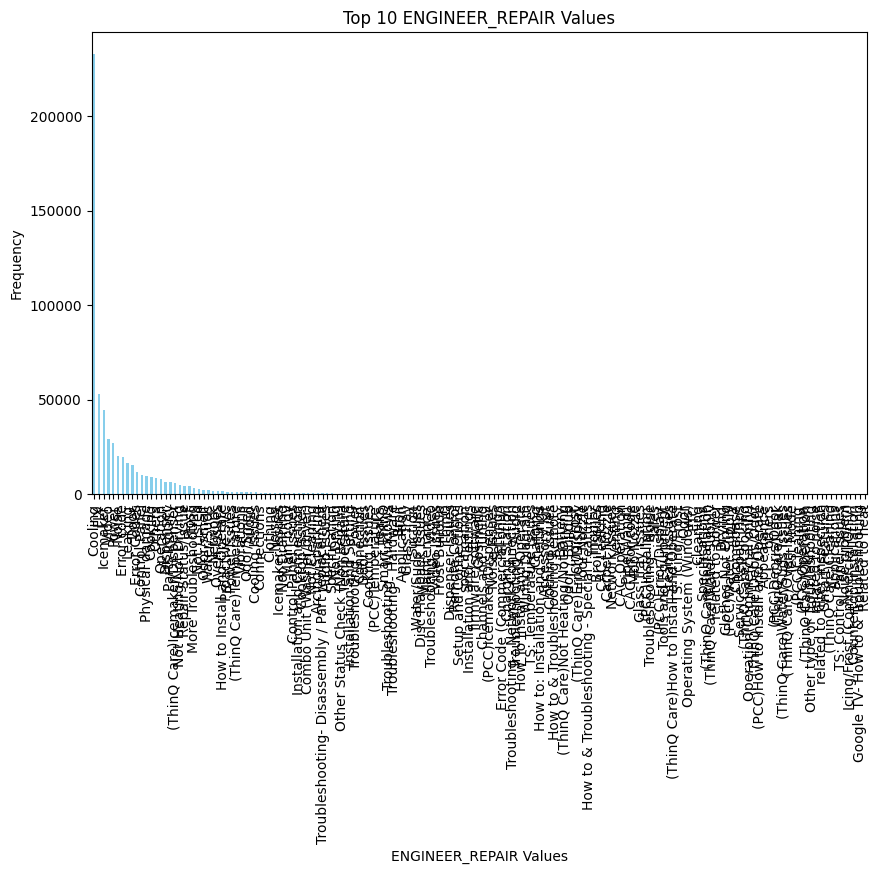

In [36]:
RECEIPT_SYMPTOM_counts = top_10_percent_df['RECEIPT_SYMPTOM'].value_counts()
# 빈도 시각화
plt.figure(figsize=(10, 6))
RECEIPT_SYMPTOM_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 ENGINEER_REPAIR Values')
plt.xlabel('ENGINEER_REPAIR Values')
plt.ylabel('Frequency')
plt.show()

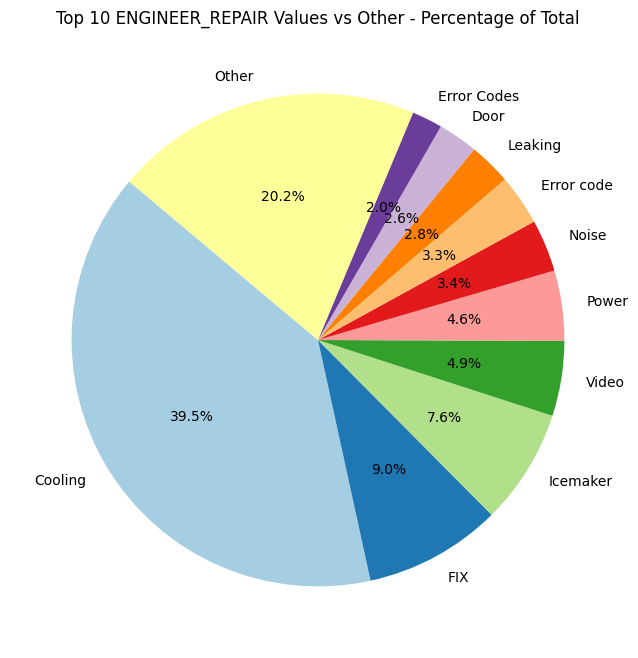

In [37]:
# 상위 10개 값을 갖는 빈도만 추출
top_10_counts = RECEIPT_SYMPTOM_counts.head(10)

# 나머지 클래스의 빈도 계산
other_counts = RECEIPT_SYMPTOM_counts[10:].sum()

# 상위 10개와 나머지 클래스의 빈도를 합쳐서 새로운 데이터프레임 생성
combined_counts = pd.concat([top_10_counts, pd.Series({'Other': other_counts})])

# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 ENGINEER_REPAIR Values vs Other - Percentage of Total')
plt.show()

In [38]:
# 상위 10개 값을 갖는 관측치만 필터링
top_10_values = RECEIPT_SYMPTOM_counts.head(10).index
top_10_percent_df = top_10_percent_df[top_10_percent_df['RECEIPT_SYMPTOM'].isin(top_10_values)]
top_10_percent_df.shape

(469719, 26)

## PREV_RECEIPT_SYMPTOM 상위 10개 추출

In [39]:
top_10_percent_df['PREV_RECEIPT_SYMPTOM'].value_counts()

PREV_RECEIPT_SYMPTOM
Cooling                           16246
Icemaker                           3979
FIX                                3976
Noise                              2141
Leaking                            1517
                                  ...  
Other types of Troubleshooting        1
Temperature                           1
(PCC)Operation                        1
Connection                            1
Cooktop Issues                        1
Name: count, Length: 85, dtype: int64

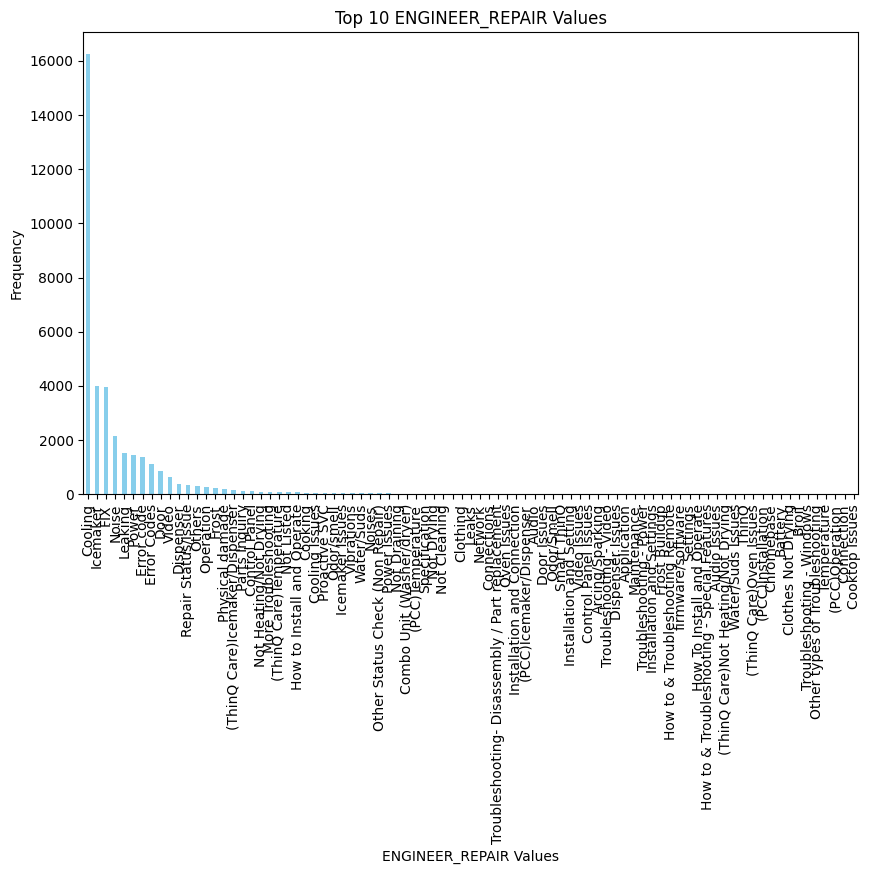

In [40]:
PREV_RECEIPT_SYMPTOM_counts = top_10_percent_df['PREV_RECEIPT_SYMPTOM'].value_counts()
# 빈도 시각화
plt.figure(figsize=(10, 6))
PREV_RECEIPT_SYMPTOM_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 ENGINEER_REPAIR Values')
plt.xlabel('ENGINEER_REPAIR Values')
plt.ylabel('Frequency')
plt.show()

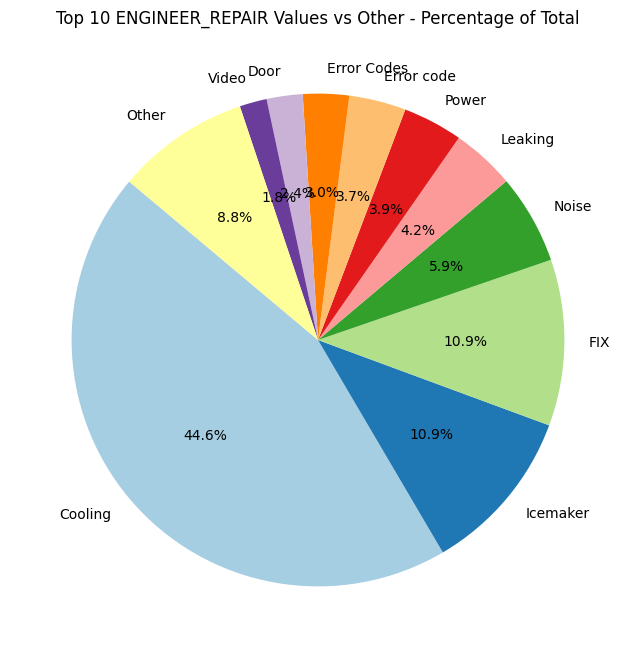

In [41]:
# 상위 10개 값을 갖는 빈도만 추출
top_10_counts = PREV_RECEIPT_SYMPTOM_counts.head(10)

# 나머지 클래스의 빈도 계산
other_counts = PREV_RECEIPT_SYMPTOM_counts[10:].sum()

# 상위 10개와 나머지 클래스의 빈도를 합쳐서 새로운 데이터프레임 생성
combined_counts = pd.concat([top_10_counts, pd.Series({'Other': other_counts})])

# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 ENGINEER_REPAIR Values vs Other - Percentage of Total')
plt.show()

In [42]:
# 상위 10개 값을 갖는 관측치만 필터링
top_10_values = PREV_RECEIPT_SYMPTOM_counts.head(10).index
top_10_percent_df = top_10_percent_df[top_10_percent_df['PREV_RECEIPT_SYMPTOM'].isin(top_10_values)]
top_10_percent_df.shape


(33262, 26)

In [ ]:
top_10_percent_df.to_csv('C:/Users/jjccyy9741/OneDrive - postech.ac.kr/바탕 화면/1211.전처리.csv')